## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

## Reading in Data 

In [2]:
df = pd.read_csv('../datasets/subs2.csv', encoding='utf-8')


In [3]:
df.head()

,title,self_text,subreddit,text_words
0,Looking for Costa Rican Spanish speakers for a...,hey guys! i'm a linguistics phd student and i'...,0,123
1,Traveling to CR as a tica...,hi! i am costa_rican-american but have never b...,0,167
2,Puerto Viejo,"sunset pic on the caribbean coast, thanks to s...",0,11
3,Bought a bed. They made it right in front of me!,nice craftsmanship and impressed they built an...,0,26
4,How can I give back to Costa Rica?,"hi, if i move to costa_rica part time as an am...",0,36


## Reading in Custom Stopwords


In [4]:
stopwords_df = pd.read_csv('../datasets/custom_stopwords.csv')
stopwords_new = stopwords_df['custom_stopwords'].tolist()
stopwords = stopwords.words('english')
stopwords_custom = stopwords +stopwords_new

## Setting up Data 

In [5]:
X= df['self_text']
y=df['subreddit']

## Train Test Split 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Setting up stemming and lemmatizing 

In [7]:
def lemmatize(words):
    split_words = words.split()
    lem = WordNetLemmatizer()
    return ' '.join([lem.lemmatize(word) for word in split_words])

In [8]:
def stem(words):
    split_words = words.split()
    stem = PorterStemmer()
    return ' '.join([stem.stem(word) for word in split_words])

## Gridsearch with Naive Bayes

In [15]:
pipe_nb.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'nb': MultinomialNB(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [9]:
pipe_nb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
     ])

In [ ]:
params = {
    'cvec__stop_words' : [None, "english", stopwords_custom, stopwords_new],
    'cvec__preprocessor': [None, lemmatize, stem],
    'cvec__ngram_range': [(1,3), (1,1), (1,2), (2,2)],
    'nb__fit_prior': [True, False],
    'nb__alpha': [.3, .5, .75, 1]
}

gs = GridSearchCV(pipe_nb, param_grid=params)
gs.fit(X_train, y_train)

In [11]:
print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Train: 0.8247261345852895
Test: 0.7077464788732394


In [12]:
gs.best_params_

{'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': 'english',
 'nb__alpha': 0.5}

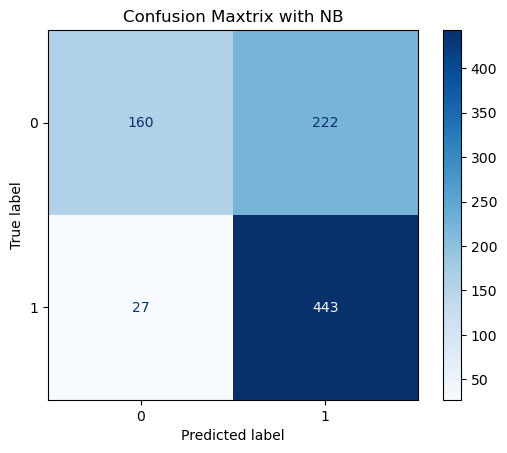

In [13]:
preds = gs.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap=plt.cm.Blues)
plt.title("Confusion Maxtrix with NB");
plt.savefig('../pictures/Confusion Maxtrix with NB.png', format='png')